La clase nodo es una estructura que sirve para construir el árbol de búsqueda, un nodo en el árbol tiene un estado (depende del problema), un nodo padre (nodo a partir del cual fue generado), la acción (operación que se le aplico al estado del nodo padre para generar el estado del nodo actual). Los demás parámetros y variables se utilizarán en otros algoritmos de búsqueda.

In [ ]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0,depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = depth
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        rep = 'Node(' + str(self.state)+')'
        
        return rep


    def __eq__(self, node):
        return self.state == node.state
  

In [ ]:
initial=Node([[8,1,3],[2,4,5],[0,7,6]])
print(initial)

Node([[8, 1, 3], [2, 4, 5], [0, 7, 6]])


Problem es una clase abstracta que se utiliza como base para crear una jerarquía de problemas de búsqueda, el método abstracto de la clase problema es expand, la implementación de este método en una clase derivada debe retornar el listado de nodos hijos generados a partir de la aplicación de las acciones u operaciones al nodo que se recibe como argumento de entrada.

In [ ]:



class Problem(object):
  
  def __init__(self, initial, goal):
    
    if not isinstance(initial,Node):
      raise TypeError('node type is required for initial')
    if not isinstance(goal,Node):
      raise TypeError('node type is required for initial')

    self.initial = initial
    self.goal = goal
  
  def isGoal(self, node):

    raise NotImplementedError
  def expand(self, node):
    
    raise NotImplementedError

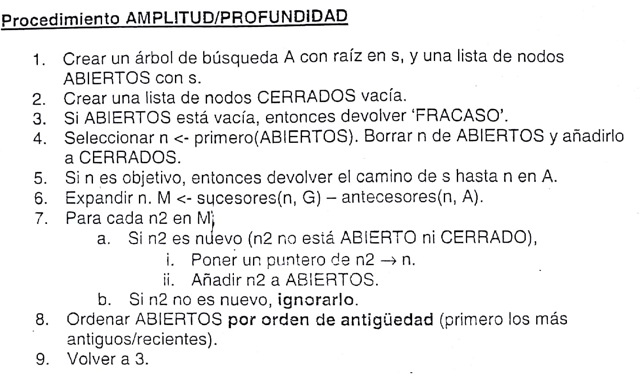

In [ ]:
class BreadthFirstSearch:
  def __init__(self, problem):
    self.open=[]
    self.close=[]
    self.children=[]
    self.problem=problem

  def run(self):
    self.open.append(self.problem.initial)
    solution=[]
    while self.open :
      actual=self.open.pop(0)
      print('actual',actual)
      if(actual == self.problem.goal):
        while actual:
          action=actual.action
          actual=actual.parent
          solution.append(action)
        solution.reverse()
        return solution

      else:
        self.close.append(actual)
        self.children=self.problem.expand(actual)
        self.clean()
        self.open.extend(self.children)
    return solution

  def clean(self):
    for n in self.children:
      for m in self.open:
        if(n==m):
          self.children.remove(n)
    for n in self.children:
      for m in self.close:
        if(n==m):
          self.children.remove(n)

In [ ]:
class DFSLim:
  def __init__(self, problem,limit=4):
    self.open=[]
    self.close=[]
    self.children=[]
    self.problem=problem
    self.limit = limit

  def run(self):
    self.open.append(self.problem.initial)
    solution=[]
    while self.open :
      actual=self.open.pop()
      
      print('actual',actual,'- PROFUNDIDAD',actual.depth)
      #print('prueba 0',prof,self.limit)
      
      if(self.problem.isGoal(actual)):
        print('SOLUCION ENCONTRADA EN PROFUNDIDAD: ',actual.depth)
        while actual:
          action=actual.action
          actual=actual.parent
          solution.append(action)
        solution.reverse()
        return solution
      if(actual.depth < self.limit):
        
        self.close.append(actual)
        self.children=self.problem.expand(actual)
        self.clean()
        #self.open.extend(self.children)
        for child in self.children:
          self.open.append(child)
    return solution

  def clean(self):
    for n in self.children[:]:
      for m in self.open:
        if(n==m):
          self.children.remove(n)
    for n in self.children[:]:
      for m in self.close:
        if(n==m):
          self.children.remove(n)

In [ ]:
pila = [3,4,5]
pila.insert(0,88)
pila.append(44)
ultimo = pila.pop()
print(pila,ultimo)

[88, 3, 4, 5] 44


La clase Puzzle hereda de Problem, implementa el método expand soportado en los métodos que implementan  las operaciones u acciones left, right, up y down las cuales permitiran  generar los nodos hijos de un nodo/tablero que se recibe por argumento.

In [ ]:
class Reinas(Problem) :
  def __init__(self, initial, goal):
      Problem.__init__(self,initial, goal)

  def atack(self,node):
    state = node.state

In [ ]:
import copy

class Puzzle(Problem):
  def __init__(self, initial, goal):
    self.goal=goal
    Problem.__init__(self, initial, goal)


  def expand(self, node):
    children=[]

    l=self.left(node)
    if l is not None:
      children.append(l)

    r=self.right(node)
    if r is not None:
      children.append(r)
    
    u=self.up(node)
    if u is not None:
      children.append(u)

    d=self.down(node)
    if d is not None:
      children.append(d)

    return children

  def isGoal(self, node):
    if(node == self.goal):
      return True
    else:
      return False

  def left(self,node):
    state=node.state
    i,j=self.findgap(state)
    if(i>-1 and j>-1 and j<2):
      newstate=copy.deepcopy(state)
      valor=newstate[i][j+1]
      newstate[i][j+1]=0
      newstate[i][j]=valor
      newnode=Node(newstate,node,'left')
      return newnode
    else:
      return None

  def right(self,node):
    state=node.state
    i,j=self.findgap(state)
    if(i>-1 and j>-1 and j>0):
      newstate=copy.deepcopy(state)
      valor=newstate[i][j-1]
      newstate[i][j-1]=0
      newstate[i][j]=valor
      newnode=Node(newstate,node,'right')
      return newnode
    else:
      return None

  def up(self,node):
    state=node.state
    i,j=self.findgap(state)
    if(i>-1 and j>-1 and i<2):
      newstate=copy.deepcopy(state)
      valor=newstate[i+1][j]
      newstate[i+1][j]=0
      newstate[i][j]=valor
      newnode=Node(newstate,node,'up')
      return newnode
    else:
      return None

  def down(self,node):
    state=node.state
    i,j=self.findgap(state)
    if(i>-1 and j>-1 and i>0):
      newstate=copy.deepcopy(state)
      valor=newstate[i-1][j]
      newstate[i-1][j]=0
      newstate[i][j]=valor
      newnode=Node(newstate,node,'down')
      return newnode
    else:
      return None

  def findgap(self, state):
    for i, row in enumerate(state):
      for j, col in enumerate(row):
        if col==0 :
          return i, j
    return -1,-1

Función principal, la cual ejecuta el BFS para el problema del puzzle tomando como argumentos de entrada el estado inicial y final (acorde al problema del puzzle)

In [ ]:
def main():
    initial=Node([[1,2,3],[0,5,6],[4,7,8]])
    goal=Node([[1,2,3],[4,5,6],[0,7,8]])
    #goal= Node(None)
    puzzle=Puzzle(initial,goal)
    #bfs=BreadthFirstSearch(puzzle)
    dls= DFSLim(puzzle)
    solution=dls.run()
    print(solution)
    

if __name__ == "__main__":
    main()

actual Node([[1, 2, 3], [0, 5, 6], [4, 7, 8]]) - PROFUNDIDAD 0
actual Node([[0, 2, 3], [1, 5, 6], [4, 7, 8]]) - PROFUNDIDAD 1
actual Node([[2, 0, 3], [1, 5, 6], [4, 7, 8]]) - PROFUNDIDAD 2
actual Node([[2, 5, 3], [1, 0, 6], [4, 7, 8]]) - PROFUNDIDAD 3
actual Node([[2, 5, 3], [1, 7, 6], [4, 0, 8]]) - PROFUNDIDAD 4
actual Node([[2, 5, 3], [0, 1, 6], [4, 7, 8]]) - PROFUNDIDAD 4
actual Node([[2, 5, 3], [1, 6, 0], [4, 7, 8]]) - PROFUNDIDAD 4
actual Node([[2, 3, 0], [1, 5, 6], [4, 7, 8]]) - PROFUNDIDAD 3
actual Node([[2, 3, 6], [1, 5, 0], [4, 7, 8]]) - PROFUNDIDAD 4
actual Node([[1, 2, 3], [4, 5, 6], [0, 7, 8]]) - PROFUNDIDAD 1
SOLUCION ENCONTRADA EN PROFUNDIDAD:  1
[None, 'up']
